## Concepts

### Overfitting and underfitting

Overfitting occurs when the model fits the data too well or starts capturing the noise as well. On the other hand, underfitting occurs when the model does not fit the data good enough. Both of these would lead to poor predictions on new data and can be avoided using **train-test split** or **cross validation**. Underfitting does not happen too often but its very common to encounter overfitting. In other words, overfitting is the result of fitting over complicated models.

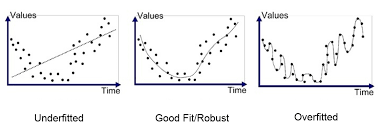

### Bias Variance tradeoff

**Bias error** - Bias are the simplifying assumptions made by the model to make the target function easier to learn. High bias means more assumptions about the target functions. Parametric algorithms normally have a high bias and thus they are fast to learn and easier to interpret. In turn, they might have lesser predictive power on complex problems which fail to meet the specifying assumptions.

Examples of high bias algorithms - Linear and logistic regression          
Examples of low bias algorithms - Decision trees, Support Vector Machines

**Variance error** - It is the amount that the estimate of the target function will change with change in training data or how much does the changes in training data impact the output. We should always expect some variance in every algorithm but it should not change too much from one training data to another. High variance algorithms are usually good with predictive power but may not be very highly predictable. 

Examples of high variance algorithms - Decision trees, Support vector machines        
Examples of low variance algorithms - Linear regression, Logistic regression


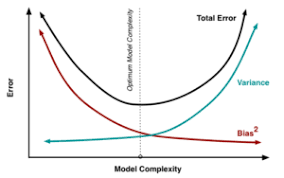

### Cross validation

When we use train-test splits, we may encounter following errors/issues-       

    1. The sample changes based on random state value and thus the result is sort of dependent on the random state value or 
    the training data split.
    2. Might get incorrect splits because of random sampling.
    3. Only a part of the data is used for training the model. 
    
**Cross-validation or k-fold cross validation** gives a way to overcome these issues and present better results. In cross validation, the training data is split into multiple parts or **folds**. For every iteration, one of the parts is used as test data while others are used as training data. The result is calculated as the average value for each iteration. This is primarily used to find the best value of the parameter and to present the best value for the metrics. K = 10 is widely used as industry standards. If we have huge amounts of data, even k = 5 would work fine. 

**Leave one out cross validation or LOOCV** is a specific case of k-fold cross validation where one observation from the data is kept as test data while the model is trained using remaining data. In the next iteration, next observation is kept as test data while everything else forms the training data. Once again, the result is calculated by taking mean of all these iterations. This can be computationally intensive and thus is not generally preferred.   


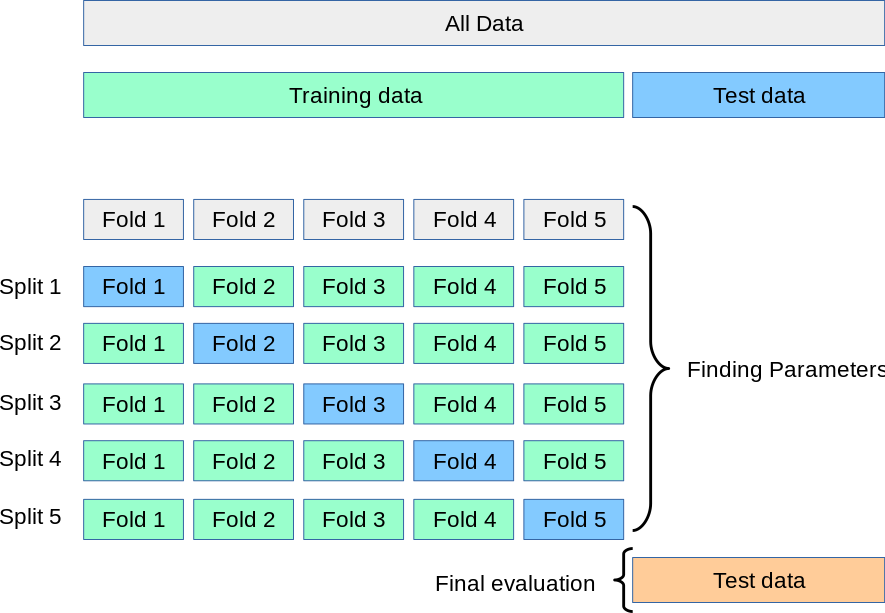
    

### Bootstrap

Bootstrapping works by taking multiple samples from the data **with replacement** and the data points which are not chosen are used as the test data. It finds its application in the form of bagging(or bootstrap aggregating) in Random Forest algorithm. It comes in pretty handy when we have smaller dataset to train the model.

In [1]:
# Generating bootstrap data
import numpy as np
data = [1,2,3,4,5,6,7]
sample_1 = np.random.choice(data, len(data))
print("Sample:", sample_1)

Sample: [4 3 5 4 6 6 3]


In [2]:
# another example or API
from sklearn.utils import resample
# data sample
data = [1, 2, 3, 4, 5, 6]
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=6, random_state=10)
print('Bootstrap Sample: %s' % boot)

Bootstrap Sample: [2, 6, 5, 1, 2, 4]


### Subset selection methods

#### Best subset selection

In this method, we run models using all possible combinations of the available variables e.g. 1 variable at a time, all possible combinations of 2 variables and so on. Then the best model can be selected out of all these models based on the required metrics. This gets highly impractical and calculation intensive as the number of variables increases. If there are n variables, we will basically have $2^{n}$ models to compare. 

#### Forward stepwise selection and backward stepwise selection methods

In the **forward stepwise selection** method, we start with a null model i.e. a model with no variable. Then we add all the variables one by one to the model and check which variable is giving us the best results. The model with the best result is then marked as final at this stage. In the next iteration, we again start adding all the variables one by one to this model with 1 variable. The model with best results is marked as the best model with 2 variables and the process goes on like this.    

The **backward stepwise selection** method works quite similar to the forward selection method other than the difference that we start with a model with all variables and then start removing one variable at a time.

#### Shrinkage methods

This includes Ridge and Lasso regression which has been discussed below.

## Loading required packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

import seaborn as sns

#import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.api import add_constant

F:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Loading data

In [4]:
boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Training and test data split

In [8]:
X = boston_df.drop('MEDV',axis = 1)
Y = boston_df['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Multiple linear regression

In [9]:
lm1 = LinearRegression()
lm1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lm1.coef_))], axis = 1)
# coefficients.columns = [['Variable','Coefficients']]
# coefficients

In [11]:
predicted_train = lm1.predict(X_train)
predicted_test = lm1.predict(X_test)

print("Mean squared error for training data: %.2f" % mean_squared_error(Y_train, predicted_train))
print('R2 score for training data: %.2f' % r2_score(Y_train, predicted_train))

print("Mean squared error for test data: %.2f" % mean_squared_error(Y_test, predicted_test))
print('R2 score for Multiple test data: %.2f' % r2_score(Y_test, predicted_test))

Mean squared error for training data: 22.48
R2 score for training data: 0.74
Mean squared error for test data: 20.87
R2 score for Multiple test data: 0.73


In [12]:
lm1.coef_

array([-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,  2.70536624e+00,
       -1.59570504e+01,  3.41397332e+00,  1.11887670e-03, -1.49308124e+00,
        3.64422378e-01, -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
       -5.94076089e-01])

### Changing random state values

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

lm1 = LinearRegression()
lm1.fit(X_train,Y_train)

predicted_train = lm1.predict(X_train)
predicted_test = lm1.predict(X_test)

print("Mean squared error for training data: %.2f" % mean_squared_error(Y_train, predicted_train))
print('R2 score for training data: %.2f' % r2_score(Y_train, predicted_train))

print("Mean squared error for test data: %.2f" % mean_squared_error(Y_test, predicted_test))
print('R2 score for Multiple test data: %.2f' % r2_score(Y_test, predicted_test))

Mean squared error for training data: 19.23
R2 score for training data: 0.75
Mean squared error for test data: 34.41
R2 score for Multiple test data: 0.67


### Cross- validation

In [14]:
lm2 = LinearRegression()

In [15]:
lm2.fit(boston.data, boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
predicted = lm2.predict(boston.data)

print("Mean squared error: %.2f" % mean_squared_error(boston.target, predicted))
print('R2 score: %.2f' % r2_score(boston.target, predicted))

Mean squared error: 21.89
R2 score: 0.74


In [17]:
#adding Cross Validation in Simple Linear Regression
lm2 = LinearRegression()

# Using mean squared error as scoring parameter
# 10-fold 
scores = cross_val_score(lm2, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
# the scores are by default negative:- maybe coded in python like this
print("Scores:",scores)
print("Average score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
Average score: -34.71 (+/- 91.15)


In [18]:
from sklearn.model_selection import cross_validate

# The cross_validate function differs from cross_val_score in two ways -

    #1. It allows specifying multiple metrics for evaluation.
    #2. It returns a dict containing training scores, fit-times and score-times in addition to the test score.

scoring = ['neg_mean_squared_error', 'r2']
scores = cross_validate(lm2, boston.data, boston.target, scoring=scoring,cv=10, return_train_score=False)
print(sorted(scores.keys()))

print('Mean squared error:',scores['test_neg_mean_squared_error'].mean())
print('r2:',scores['test_r2'].mean())

['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2']
Mean squared error: -34.705255944524964
r2: 0.20252899006054909


In [19]:
scores['test_r2'],scores['test_r2'].mean()

(array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
         0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ]),
 0.20252899006054909)

In [20]:
scores

{'fit_time': array([0.00086069, 0.00039053, 0.00085425, 0.00052762, 0.        ,
        0.00165009, 0.00100183, 0.00099802, 0.00199175, 0.00099754]),
 'score_time': array([0.00099969, 0.00199437, 0.00188708, 0.        , 0.00134039,
        0.        , 0.00196838, 0.00099754, 0.00099659, 0.00099707]),
 'test_neg_mean_squared_error': array([  -9.28694671,  -14.15128316,  -14.07360615,  -35.20692433,
         -31.88511666,  -19.83587796,   -9.94726918, -168.37537954,
         -33.32974507,  -10.96041068]),
 'test_r2': array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
         0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ])}

## Regularized regression

Ridge and Lasso regression are two of the techniques falling under this umbrella. They help in reducing overfitting in a model along with variable selection. They work by penalizing the magnitude of the coefficients along with minimizing the error between predicted and actual values. As the model keeps getting more and more complicated, the variable coefficients keep on increasing. Due to that the model starts overfitting. Regularized regression help in reducing the coefficients by either reducing the coefficients to a smaller value or actually making some of them zero. 

### Ridge regression

Ridge regression performs **L2 regularization**. It adds penalty to the coefficients in the form of square of magnitude of coefficients. Thus the objective function can be listed as              
               RSS + $\alpha$ * (sum of squares of coefficients)             
               
When $\alpha$ = 0, then it becomes linear regression while if $\alpha$ is equal to infinity, then the coefficients would be 0. As the $\alpha$ value increases, the model complexity decreases because the coefficients become smaller. This can help in reducing overfitting but very low value of $\alpha$ can lead to underfitting. The best way to find the right value of $\alpha$ is cross-validation.               

#### Default alpha value of 1

In [21]:
rm1 = Ridge()

rm1.fit(X_train,Y_train)

predicted = rm1.predict(X_test)

print("Mean squared error for training data: %.2f" % mean_squared_error(Y_test, predicted))
print('R2 score for training data: %.2f' % r2_score(Y_test, predicted))

Mean squared error for training data: 34.98
R2 score for training data: 0.67


In [22]:
rm1.coef_

array([-0.12530634,  0.06409506, -0.03523162,  1.83010758, -9.09243767,
        3.17078623,  0.00953502, -1.37648742,  0.28703131, -0.01260422,
       -0.73406431,  0.01184846, -0.59141428])

#### With cross-validation

In [23]:
rm2 = Ridge(alpha=1)

# fitting a model and computing the score 10 consecutive times (with different splits each time)
scores = cross_val_score(rm2, boston.data, boston.target, cv=10)

print("Scores:",scores)
print("Average error: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [ 0.73288024  0.53053457 -0.53943322  0.62684493  0.57977914  0.75248112
  0.40833757 -0.13005149 -0.79325061  0.39354646]
Average error: 0.26 (+/- 1.04)


In [24]:
rm2 = Ridge(alpha=1.0)

# R^2 (coefficient of determination) regression score function.

# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always 
# predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

# fitting a model and computing the score 10 consecutive times (with different splits each time)
scores = cross_val_score(rm2, boston.data, boston.target, cv=10,scoring='r2')

print("Scores:",scores)
print("Average error: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [ 0.73288024  0.53053457 -0.53943322  0.62684493  0.57977914  0.75248112
  0.40833757 -0.13005149 -0.79325061  0.39354646]
Average error: 0.26 (+/- 1.04)


#### GridSearchCV

In [25]:
rm3 = Ridge()
# I am giving the code a list of possible alpha values
parameters = {'alpha':[.01,.05,0.1,0.5,.75,1,2,5,10,20,30]}
#GridSearchCV is going through the entire list
ridge_reg = GridSearchCV(rm3,parameters,scoring = 'neg_mean_squared_error', cv = 10)
ridge_reg.fit(boston.data,boston.target)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 0.75, 1, 2, 5, 10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [26]:
ridge_reg.best_estimator_

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
#out of the list we provided, the best value would be 30. The code itself id looping through the best possible alpha value 
#out of the give list
ridge_reg.best_params_

{'alpha': 30}

In [28]:
ridge_reg.best_score_

-31.279413641739737

In [29]:
rm4 = Ridge(alpha = 30)
rm4.fit(X_train,Y_train)

predicted = rm4.predict(X_test)

print("Mean squared error for training data: %.2f" % mean_squared_error(Y_test, predicted))
print('R2 score for training data: %.2f' % r2_score(Y_test, predicted))

Mean squared error for training data: 37.89
R2 score for training data: 0.64


In [30]:
coefficients = pd.concat([pd.DataFrame(boston.feature_names),pd.DataFrame(np.transpose(rm4.coef_))], axis = 1)
coefficients.columns = [['Variable','Coefficients']]
coefficients

,Variable,Coefficients
0,CRIM,-0.123463
1,ZN,0.067830
2,INDUS,-0.069707
3,CHAS,0.836876
4,NOX,-0.658204
5,RM,2.593284
6,AGE,0.008080
7,DIS,-1.233914
8,RAD,0.287617
9,TAX,-0.014116


#### RidgeCV

In [31]:
rm5 = RidgeCV()
rm5.fit(X_train,Y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [32]:
rm5.alpha_,rm5.score(X_train,Y_train)

(0.1, 0.7500636545057386)

In [33]:
coefficients = pd.concat([pd.DataFrame(boston.feature_names),pd.DataFrame(np.transpose(rm5.coef_))], axis = 1)
coefficients.columns = [['Variable','Coefficients']]
coefficients

,Variable,Coefficients
0,CRIM,-0.127694
1,ZN,0.063338
2,INDUS,-0.012165
3,CHAS,1.954959
4,NOX,-15.081182
5,RM,3.120749
6,AGE,0.015150
7,DIS,-1.465352
8,RAD,0.301097
9,TAX,-0.012165


### Lasso Regression

LASSO stands for *Least absolute Shrinkage and Selection Operator*. It performs a **L1 regularization** or its adds a penalty factor in terms of sum of absolute values of coefficients. The objective function now becomes -          
                    
RSS + $\alpha$ * (sum of absolute values of coefficients)         

Similar to Ridge regression, if $\alpha$ value becomes 0 then its linear regression while with $\alpha$ is very large, all the coefficients become 0. The reason why it differs from Ridge regression is because this technique makes the coefficients 0 as opposed to Ridge regression, where the coefficients will tend towards zero and keep getting smaller, but never become 0.

#### Default alpha value of 1

In [34]:
lasso1 = Lasso()
lasso1.fit(X_train,Y_train)

predicted = lasso1.predict(X_test)

print("Mean squared error for training data: %.2f" % mean_squared_error(Y_test, predicted))
print('R2 score for training data: %.2f' % r2_score(Y_test, predicted))

Mean squared error for training data: 48.63
R2 score for training data: 0.54


In [35]:
lasso1.alpha

1.0

In [36]:
lasso1.coef_
# as we see that may coefficient has become 0 therefore it helps in feature selection by reducing variables  

array([-0.08816973,  0.06968158, -0.00735301,  0.        , -0.        ,
        0.1618617 ,  0.0352057 , -0.69941189,  0.26821091, -0.01535188,
       -0.54722849,  0.0100446 , -0.8021472 ])

#### With cross-validation

In [37]:
lasso2 = Lasso()

# fitting a model and computing the score 5 consecutive times (with different splits each time)
scores = cross_val_score(lasso2, boston.data, boston.target, cv=5)

print("Scores:",scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [0.56156843 0.63385562 0.33456629 0.35466066 0.27459294]
Accuracy: 0.43 (+/- 0.28)


#### GridSearchCV

In [38]:
lasso3 = Lasso()

parameters = {'alpha':[.01,.05,0.1,0.5,.75,1,2,5,10]}
lasso_reg = GridSearchCV(lasso3,parameters,scoring = 'neg_mean_squared_error', cv = 10)
lasso_reg.fit(boston.data,boston.target)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 0.75, 1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [39]:
lasso_reg.best_params_,lasso_reg.best_score_

({'alpha': 0.5}, -32.879516838252556)

In [40]:
lasso4 = Lasso(alpha = 0.5)
lasso4.fit(X_train,Y_train)

predicted = lasso4.predict(X_test)

print("Mean squared error for training data: %.2f" % mean_squared_error(Y_test, predicted))
print('R2 score for training data: %.2f' % r2_score(Y_test, predicted))

Mean squared error for training data: 41.64
R2 score for training data: 0.60


In [41]:
coefficients = pd.concat([pd.DataFrame(boston.feature_names),pd.DataFrame(np.transpose(lasso4.coef_))], axis = 1)
coefficients.columns = [['Variable','Coefficients']]
coefficients

,Variable,Coefficients
0,CRIM,-0.106693
1,ZN,0.067315
2,INDUS,-0.033096
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.755337
6,AGE,0.018936
7,DIS,-0.973586
8,RAD,0.272686
9,TAX,-0.014630


#### LassoCV

In [42]:
lasso5 = LassoCV()
lasso5.fit(X_train,Y_train)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [43]:
lasso5.alpha_,lasso5.score(X_train,Y_train)

(0.7165394360846975, 0.7121352860551129)

In [44]:
coefficients = pd.concat([pd.DataFrame(boston.feature_names),pd.DataFrame(np.transpose(lasso5.coef_))], axis = 1)
coefficients.columns = [['Variable','Coefficients']]
coefficients

,Variable,Coefficients
0,CRIM,-0.098672
1,ZN,0.068340
2,INDUS,-0.021946
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.065226
6,AGE,0.025982
7,DIS,-0.854846
8,RAD,0.270754
9,TAX,-0.014943


## Coefficient visualization

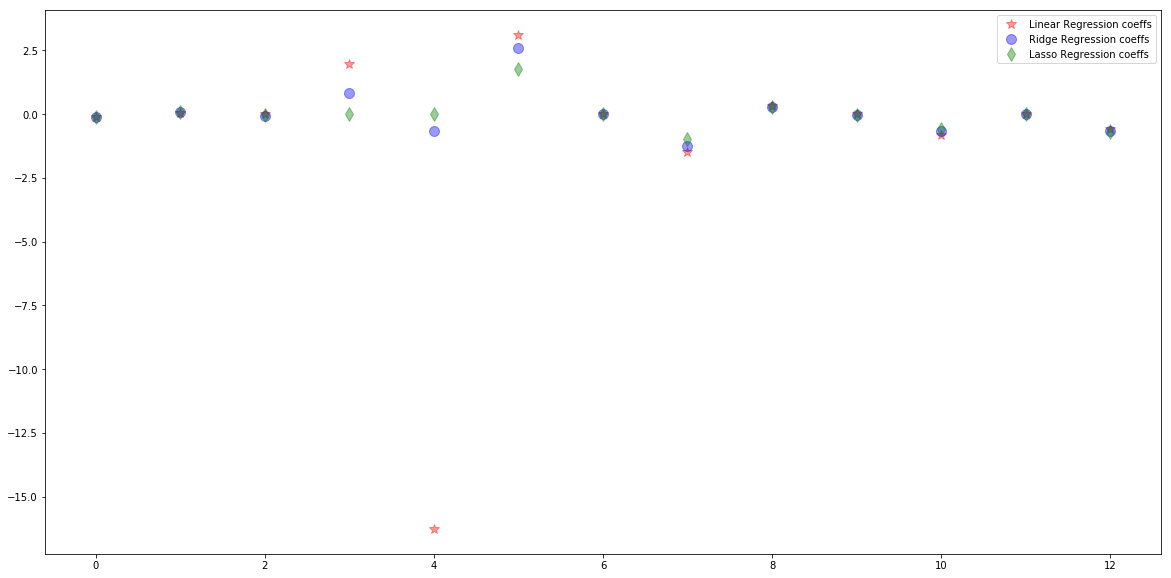

In [45]:
plt.figure(figsize=(20,10))

plt.plot(lm1.coef_,markersize=10,marker = '*',color='red',label='Linear Regression coeffs',linestyle = 'none',alpha=0.4)
plt.plot(rm4.coef_,color='blue',markersize=10,marker = 'o',label='Ridge Regression coeffs',linestyle = 'none',alpha=0.4)
plt.plot(lasso4.coef_,color='green',markersize=10,marker = 'd',label='Lasso Regression coeffs',linestyle = 'none',alpha=0.4)
plt.legend()
#alpha=0.7,linestyle='none',marker='*'

## Recursive Feature Elimination for feature selection

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [60]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [46]:
# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()

# create the RFE model and select 4 attributes
rfe = RFE(model, 4)
rfe = rfe.fit(boston.data, boston.target)

# summarize the selection of the attributes
print(rfe.support_)
print('Selected features:', boston.feature_names[rfe.support_])
print('Feature ranking', rfe.ranking_)

[False False False  True  True  True False False False False  True False
 False]
Selected features: ['CHAS' 'NOX' 'RM' 'PTRATIO']
Feature ranking [ 5  7  6  1  1  1 10  2  4  8  1  9  3]


In [47]:
# create the RFE model and select 6 attributes
rfe = RFE(model, 6)
rfe = rfe.fit(boston.data, boston.target)

# summarize the selection of the attributes
print(rfe.support_)
print('Selected features:', boston.feature_names[rfe.support_])
print('Feature ranking', rfe.ranking_)

[False False False  True  True  True False  True False False  True False
  True]
Selected features: ['CHAS' 'NOX' 'RM' 'DIS' 'PTRATIO' 'LSTAT']
Feature ranking [3 5 4 1 1 1 8 1 2 6 1 7 1]


In [48]:
#reducing X to selected Features
# new_X_train=feature_selector.transform(X_train)
# new_X_test=feature_selector.transform(X_test)

## Polynomial regression

Linear regression requires the relationship between the response and the predictor variable to be linear. If the distribution is not linear, then linear regression would lead to underfitting and would not give us the best results. To avoid this, we need to increase the model complexity and generate a regression with higher order of the variables. That's where polynomial regression comes into picture. It takes the form

y = $\beta_{0}$ + $\beta_{1}$ * x + $\beta_{2}$ * $x^{2}$ 


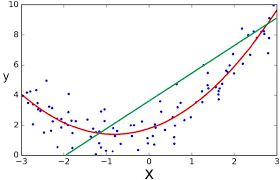

In [49]:
# Generate a new feature matrix consisting of all polynomial combinations
# of the features with degree less than or equal to the specified degree.
# For example, if an input sample is two dimensional and of the form
# [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
from sklearn.preprocessing import PolynomialFeatures

X2 = boston_df[["CRIM","RM"]]

poly = PolynomialFeatures(2)
X_poly = pd.DataFrame(poly.fit_transform(X2))
X_poly.head()

,0,1,2,3,4,5
0,1.0,0.00632,6.575,0.000040,0.041554,43.230625
1,1.0,0.02731,6.421,0.000746,0.175358,41.229241
2,1.0,0.02729,7.185,0.000745,0.196079,51.624225
3,1.0,0.03237,6.998,0.001048,0.226525,48.972004
4,1.0,0.06905,7.147,0.004768,0.493500,51.079609


In [50]:
X2.head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [51]:
print(.00632*.00632),print(6.575*6.575),print(6.575*.00632)

3.99424e-05
43.230625
0.041554


(None, None, None)

In [52]:
# with all variables
X2 = boston_df.drop(["MEDV"], axis=1)
from sklearn.preprocessing import PolynomialFeatures

# create a second order terms for all variables
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X2)
#poly.get_feature_names(X2.columns)

In [53]:
# Involving multiple parameters
y = boston_df.MEDV
slm_poly = LinearRegression()
slm_poly.fit(X_poly, y)
#print("Coefficient:", slm_poly.coef_,"\nIntercept:", slm_poly.intercept_)

coefficients = pd.concat([pd.DataFrame(poly.get_feature_names(X2.columns)),pd.DataFrame(np.transpose(slm_poly.coef_))], axis = 1)
coefficients.columns = [['Variable','Coefficients']]
coefficients

,Variable,Coefficients
0,1,-7.971623e+08
1,CRIM,-4.475604e+00
2,ZN,1.863236e-01
3,INDUS,-4.649501e+00
4,CHAS,2.990962e+01
5,NOX,1.346358e+02
6,RM,2.172662e+01
7,AGE,9.032467e-01
8,DIS,-7.419236e+00
9,RAD,1.816535e+00


In [54]:
predict_poly = slm_poly.predict(X_poly)
print("Predicted values: ", predict_poly[:4])
print("Actual values:\n", y[:4])

Predicted values:  [24.32576096 21.70742309 31.45342124 31.95919526]
Actual values:
 0    24.0
1    21.6
2    34.7
3    33.4
Name: MEDV, dtype: float64


In [55]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(y, predict_poly))

# Explained variance score: 1 is perfect prediction
print('R squared score: %.2f' % r2_score(y, predict_poly))

Mean squared error: 6.42
R squared score: 0.92


## Exponential regression

Exponential regression is a simple non-linear model which takes the form y = a$b^{x}$. By taking log on both the sides, this can be transformed to        
log(y) = log(a) + x * log(b)

In this equation, a should be non-zero and b should be greater than 0 and not equal to 1.       
If b > 1, the function models exponential growth while if 0<b<1, the function models exponential decay.       
This is most useful when data values rise or fall at increasingly higher rates e.g. radioactive decay, investment growth, population growth analysis etc. 

In [56]:
"""
For this example let's consider the boston housing data.
Exponential regression is of the form y = Ar^X.
log(y) = log(Ar^X)
log(y) = log(A) + X*log(r)
"""
from sklearn.linear_model import LinearRegression
log_y = np.log(boston_df.MEDV)
X4 = boston_df[['RM']]

slm_exp = LinearRegression()
slm_exp.fit(X4, log_y)
print("Coefficient:", slm_exp.coef_,"\nIntercept:", slm_exp.intercept_)

Coefficient: [0.36768673] 
Intercept: 0.7237361931657587


In [57]:
"""
retreiving A and r. if log(A) = m, then A = exp(m)
"""
r = np.exp(slm_exp.coef_[0])
A = np.exp(slm_exp.intercept_)
print('A:', A,"r:",r)

A: 2.062123326899287 r: 1.4443894874426626


In [58]:
# Predicting values
predict_exp = [A*(r**v) for v in X4.values]
print("Predicted values: ", predict_exp[:4])
print("Actual values:\n", boston_df.MEDV[:4])

Predicted values:  [array([23.1333768]), array([21.85987361]), array([28.94985989]), array([27.02623188])]
Actual values:
 0    24.0
1    21.6
2    34.7
3    33.4
Name: MEDV, dtype: float64


In [59]:
# Measure the accuracy
from sklearn.metrics import mean_squared_error, r2_score

print("Exponential Regression Mean squared error: %.2f" % mean_squared_error(boston_df.MEDV, predict_exp))

# Explained variance score: 1 is perfect prediction
print('Exponential Regression R-squared score: %.2f' % r2_score(boston_df.MEDV, predict_exp))

Exponential Regression Mean squared error: 40.83
Exponential Regression R-squared score: 0.52
